**Date created**: 09/24/2024

**Date updated**: 10/03/2024

**Authors**: Tara Liu, Yiyi He

**Use case**:
Verify and compare previous ERA5 files downloaded by Tiger and Changmin.

**Context**:
Use station 570's t2m (temperature) in 2023-01-01 0:00 for verification.

5 source files to compare:

- Changmin's GRIB
- Changmin's NetCDF
- Tiger's NetCDF
- Tara's GRIB download 1, range 1
- Tara's GRIB download 2, range 2



|index   |format|from|value|path| recommanded?|
|---|---|---|---|---|---|
| 1 |GRIB|Changmin||/content/sample_data/Changmin-GRIB-2023-01-t2m.grib   |   ||
|2|GRIB| Tiger|   |
|  3 |NetCDF|Tiger|292.2247|/content/sample_data/Tiger-NetCDF-2023-01-t2m-region_6.nc   |No   ||
|  4 |GRIB|Tara   | 292.2857666015625 |  /content/sample_data/Tara-GRIB-download1-small-range.grib |Yes|
|  5 |GRIB|Tara  | 292.36419677734375  |  /content/sample_data/Tara-GRIB-download1-big-range.grib |Yes|


In [ ]:
! pip install xarray pygrib netCDF4

import pygrib
import xarray as xr
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


# Set the coordinate and time you are looking for
latitude = 15.28354838000
longitude = 76.64444763000
time_step = 0  # Assuming this is some reference to the time in your dataset

# Function to find the nearest lat/lon indices
def find_nearest_lat_lon(lat, lon, lats, lons):
    # Check if longitudes are in the 0-360 range
    if lons.max() > 180:
        lon = lon if lon >= 0 else lon + 360  # Convert to 0-360 if needed

    lat_idx = (np.abs(lats - lat)).argmin()
    lon_idx = (np.abs(lons - lon)).argmin()

    print(f"Selected Latitude Index: {lat_idx}, Longitude Index: {lon_idx}")
    return lat_idx, lon_idx

# 1. Read t2m from the GRIB file using pygrib
grib_file = "/content/sample_data/Changmin-GRIB-2023-01-t2m.grib"  # Replace with your file path
grbs = pygrib.open(grib_file)

# Find the t2m data (2-meter temperature) in the GRIB file
grb = grbs.select(name='2 metre temperature')[0]  # Get the first record of t2m
grib_data, grib_lats, grib_lons = grb.data()

# Print shape of the data to verify indices
print(f"Shape of grib_data: {grib_data.shape}")
print(f"Shape of grib_lats: {grib_lats.shape}, grib_lons: {grib_lons.shape}")

# Find nearest indices for the specified latitude and longitude
grib_lat_idx, grib_lon_idx = find_nearest_lat_lon(latitude, longitude, grib_lats, grib_lons)

# Ensure indices are within the bounds of the data array
if grib_lat_idx < grib_data.shape[0] and grib_lon_idx < grib_data.shape[1]:
    # Extract the t2m value for the given location
    t2m_grib_value = grib_data[grib_lat_idx, grib_lon_idx]
    print(f"GRIB t2m value at {latitude}, {longitude}: {t2m_grib_value}")
else:
    print("Error: Latitude or Longitude index out of bounds for the GRIB data.")


Shape of grib_data: (186, 222)
Shape of grib_lats: (186, 222), grib_lons: (186, 222)
Selected Latitude Index: 35076, Longitude Index: 41
Error: Latitude or Longitude index out of bounds for the GRIB data.


In [ ]:
# 2. Read t2m from the NetCDF file
netcdf_file = "/content/sample_data/Changmin-NetCDF-2023-01-t2m.nc"  # Replace with your file path
ds_netcdf = xr.open_dataset(netcdf_file)

netcdf_lats = ds_netcdf.latitude.values
netcdf_lons = ds_netcdf.longitude.values
netcdf_times = ds_netcdf.time.values

# Find nearest indices for the specified latitude and longitude
netcdf_lat_idx, netcdf_lon_idx = find_nearest_lat_lon(latitude, longitude, netcdf_lats, netcdf_lons)

# Extract t2m for the given time, latitude, and longitude
t2m_netcdf_value = ds_netcdf['t2m'].sel(time=netcdf_times[time_step], latitude=netcdf_lats[netcdf_lat_idx], longitude=netcdf_lons[netcdf_lon_idx]).values
print(f"NetCDF t2m value at {latitude}, {longitude}, time {netcdf_times[time_step]}: {t2m_netcdf_value}")



Selected Latitude Index: 158, Longitude Index: 41
NetCDF t2m value at 15.28354838, 76.64444763, time 2023-01-01T00:00:00.000000000: 272.05614007627315


In [ ]:
# 2. Read t2m from the NetCDF file
netcdf_file = "/content/sample_data/Tiger-NetCDF-2023-01-t2m-region_6.nc"  # Replace with your file path
ds_netcdf = xr.open_dataset(netcdf_file)

netcdf_lats = ds_netcdf.latitude.values
netcdf_lons = ds_netcdf.longitude.values
netcdf_times = ds_netcdf.time.values

# Find nearest indices for the specified latitude and longitude
netcdf_lat_idx, netcdf_lon_idx = find_nearest_lat_lon(latitude, longitude, netcdf_lats, netcdf_lons)

# Extract t2m for the given time, latitude, and longitude
t2m_netcdf_value = ds_netcdf['t2m'].sel(time=netcdf_times[time_step], latitude=netcdf_lats[netcdf_lat_idx], longitude=netcdf_lons[netcdf_lon_idx]).values
print(f"NetCDF t2m value at {latitude}, {longitude}, time {netcdf_times[time_step]}: {t2m_netcdf_value}")


Selected Latitude Index: 32, Longitude Index: 1
NetCDF t2m value at 15.28354838, 76.64444763, time 2023-01-01T00:00:00.000000000: 292.22476861237254


In [ ]:
!pip install xarray cartopy


In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set the coordinate and time you are looking for
latitude = 15.28354838000
longitude = 76.64444763000
time_step = 0  # Assuming this is some reference to the time in your dataset

# Function to find the nearest lat/lon indices
def find_nearest_lat_lon(lat, lon, lats, lons):
    # Check if longitudes are in the 0-360 range
    if lons.max() > 180:
        lon = lon if lon >= 0 else lon + 360  # Convert to 0-360 if needed

    lat_idx = (np.abs(lats - lat)).argmin()
    lon_idx = (np.abs(lons - lon)).argmin()

    print(f"Selected Latitude Index: {lat_idx}, Longitude Index: {lon_idx}")
    return lat_idx, lon_idx


In [ ]:

import pygrib
import pandas as pd

grbs = pygrib.open('/content/sample_data/Tara-GRIB-download1-big-range.grib')
grb = grbs.read(1)[0]
data = grb.values

lats, lons = grb.latlons()

print(f'GRIB:{grb}')
print(f'data:{data}')

df = pd.DataFrame(data)

# Display the first few rows of the DataFrame to inspect the data
# print(df.head(20))

GRIB:1:2 metre temperature:K (instant):regular_ll:surface:level 0:fcst time 24 hrs:from 202212310000
data:[[291.23382568 291.13616943 291.63104248 292.10644531 292.53356934
  293.04614258]
 [292.15020752 291.63244629 291.7590332  292.2333374  292.75097656
  293.18511963]
 [292.94677734 292.17602539 291.78845215 291.91540527 292.36419678
  292.87945557]
 [293.42236328 292.38555908 291.38470459 291.26403809 291.63317871
  291.98962402]
 [291.85919189 291.34197998 290.93963623 290.76074219 291.0302124
  291.56774902]]


In [ ]:
# Function to find the nearest grid point, accounting for 2D arrays
def find_nearest_lat_lon(lat, lon, lats, lons):
    # Calculate the distance between all lat/lon pairs and the target location
    distance = np.sqrt((lats - lat) ** 2 + (lons - lon) ** 2)
    # Get the index of the minimum distance
    idx = np.unravel_index(distance.argmin(), distance.shape)
    return idx

# Find the nearest indices for your location
lat_lon_idx = find_nearest_lat_lon(latitude, longitude, lats, lons)
print(f"Nearest grid point indices: {lat_lon_idx}")

# Extract the temperature value at that location
t2m_value = data[lat_lon_idx]
print(f"Temperature (t2m) at lat {latitude}, lon {longitude}: {t2m_value} K")



Nearest grid point indices: (2, 4)
Temperature (t2m) at lat 15.28354838, lon 76.64444763: 292.36419677734375 K


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


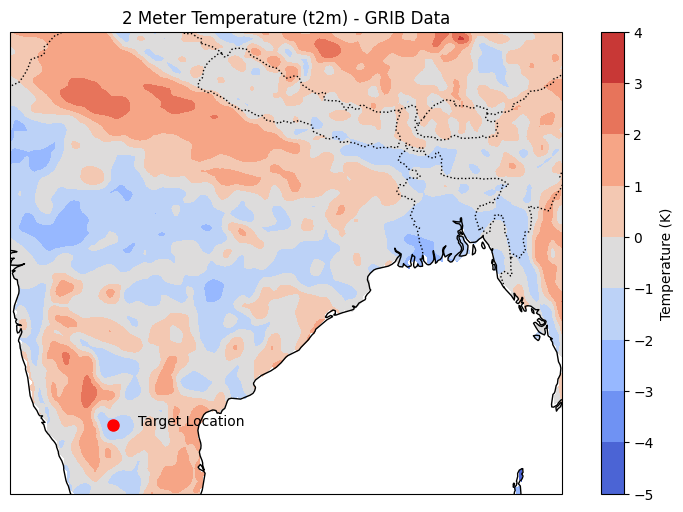

In [ ]:
# 2. Plotting the t2m data on a map

# Plot the map using Cartopy
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and borders for context
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the temperature data
plt.contourf(lons, lats, data, cmap='coolwarm', transform=ccrs.PlateCarree())

# Mark the specific coordinate
plt.plot(longitude, latitude, marker='o', color='red', markersize=8, transform=ccrs.PlateCarree())
plt.text(longitude + 1, latitude, 'Target Location', transform=ccrs.PlateCarree())

# Set title and display the plot
plt.title('2 Meter Temperature (t2m) - GRIB Data')
plt.colorbar(label="Temperature (K)")
plt.show()